# 2. scikit-learnで統計的学習

## 2.1 はじめに

本ノートブックでは，[A tutorial on statistical-learning for scientific data processing](http://scikit-learn.org/stable/tutorial/statistical_inference/index.html)を参考に，scikit-learnにおける統計的学習について復習します．

統計的学習とは，[統計的推論](https://kotobank.jp/word/%E7%B5%B1%E8%A8%88%E7%9A%84%E6%8E%A8%E8%AB%96-103447)（有限のサンプルから母集団の統計的
特性を推し量ること）を目的とする，機械学習の一分野です．

## 2.2 下準備

### Datasets

scikit-learnでは，２次元配列でdatasetを表現します．一次元目をサンプル軸（samples axis），二次元目を特徴軸（features axis）と呼びます．

以下は，iris datasetの例です．

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

それぞれ4つのfeature（萼片長，萼片幅，花弁長，花弁幅）を持つsampleが150個あることを示しています．詳細は，`iris.DESCR`をご参照ください．

In [2]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

外部データに対しscikit-learnを使う際は，そのデータの形状を`(n_samples, n_features)`に整える必要があります．

### 予測モデル（Estimator）

**フィッティング**：scikit-learnの主なAPIは，与えれたデータに予測モデルをフィッティングさせるためのものです．scikit-learnは，あらゆる学習問題（分類，回帰，クラスタリング，次元削減）に対応可能な予測モデルを用意しています．

全ての予測モデルは，`fit`メソッドによりdatasetを学習します．

In [3]:
from sklearn import svm
clf = svm.SVC()
clf.fit(iris.data[:-1], iris.target[:-1])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Parameter

予測モデルの全てのパラメータは，初期化時に設定することもできますし，別途変数として直接設定することもできます．

In [4]:
clf2 = svm.SVC(gamma=0.001)

In [5]:
clf2.gamma=0.01

学習後にパラメータを変更した場合，予測モデルはどう振る舞うのでしょうか？

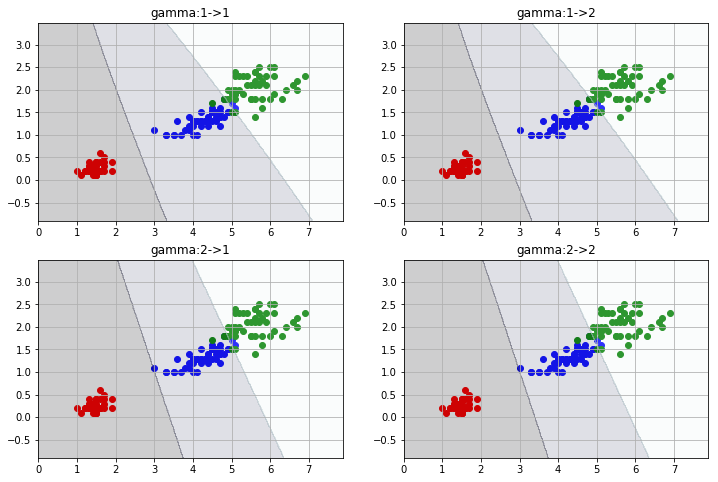

In [6]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Iris データセットを使う
features = iris.data
target = iris.target
target_names = iris.target_names
labels = target_names[target]

# Petal length と Petal width を特徴量として取り出す
setosa_petal_length = features[labels == 'setosa', 2]
setosa_petal_width = features[labels == 'setosa', 3]
setosa = np.c_[setosa_petal_length, setosa_petal_width]
versicolor_petal_length = features[labels == 'versicolor', 2]
versicolor_petal_width = features[labels == 'versicolor', 3]
versicolor = np.c_[versicolor_petal_length, versicolor_petal_width]
virginica_petal_length = features[labels == 'virginica', 2]
virginica_petal_width = features[labels == 'virginica', 3]
virginica = np.c_[virginica_petal_length, virginica_petal_width]

# 教師信号を作る
training_data = np.r_[setosa, versicolor, virginica]
training_labels = np.r_[
    np.zeros(len(setosa)),
    np.ones(len(versicolor)),
    np.ones(len(versicolor)) * 2,
]

# グラフのサイズを指定する
plt.figure(figsize=(12, 8))


for i in np.arange(4):
    plt.subplot(2, 2, i+1)

    # 教師信号をプロットする
    plt.scatter(setosa[:, 0], setosa[:, 1], color='red')
    plt.scatter(versicolor[:, 0], versicolor[:, 1], color='blue')
    plt.scatter(virginica[:, 0], virginica[:, 1], color='green')

    # 教師信号で学習する
    gamma1=0.1
    gamma2=0.001
    if i == 0:
        plt.title('gamma:1->1')
        clf = svm.SVC()
        clf.gamma=gamma1
        clf.fit(training_data, training_labels)
        clf.gamma=gamma1
    if i == 1:
        plt.title('gamma:1->2')
        clf = svm.SVC()
        clf.gamma=gamma1
        clf.fit(training_data, training_labels)
        clf.gamma=gamma2
    if i == 2:
        plt.title('gamma:2->1')
        clf = svm.SVC()
        clf.gamma=gamma2
        clf.fit(training_data, training_labels)
        clf.gamma=gamma1
    if i == 3:
        plt.title('gamma:2->2')
        clf = svm.SVC()
        clf.gamma=gamma2
        clf.fit(training_data, training_labels)
        clf.gamma=gamma1

    # データの範囲でメッシュ状に点を取る
    training_x_min = training_data[:, 0].min() - 1
    training_x_max = training_data[:, 0].max() + 1
    training_y_min = training_data[:, 1].min() - 1
    training_y_max = training_data[:, 1].max() + 1
    grid_interval = 0.02
    xx, yy = np.meshgrid(
        np.arange(training_x_min, training_x_max, grid_interval),
        np.arange(training_y_min, training_y_max, grid_interval),
    )

    # 各点を分類する
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 分類結果を表示する
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.bone, alpha=0.2)
    plt.grid()
    
# グラフを表示する


plt.autoscale()

学習後に`gamma`を変更しただけでは，予測モデルの振る舞いは変わらないようです．パラメータを変更後は，都度`fit`させる必要があることに注意しましょう．

### Estimated parameter

学習の結果，予測モデルは幾つかの内部パラメータを更新します．これらパラメータはアンダーバー（`*_`）で終わるattributeとして，ユーザに提供されます．

In [7]:
clf.support_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

## 2.3 教師あり学習

[教師あり学習（supervised learning）]()では，特徴データ`x`とターゲットデータ`y`の関係性を学習します．多くの場合，`y`は長さ`n_sample`の一次元配列です．

scikit-learnの全ての教師あり学習向け予測モデルは，フィッティングのための`fit(x, y)`メソッドと，未知の入力`x`から`y`を予測するための`predict(x)`メソッドを持ちます．

与えられたデータの（有限個の）ラベルを予測するとき，**分類**問題と呼びます．一方で，データの（連続的な）変数を予測するとき，**回帰**問題と呼びます．scikit-learnにおける分類問題では，`y`は整数ベクトルか文字列で表現されます．

機械学習特有の用語については，[1. scikit-learn入門](https://github.com/haltaro/ml-tutorial/blob/master/01.intro_to_scikit-learn.ipynb)をご参照ください．

### 2.3.1 Nearest neighbor

`iris`データセットを使い，4つの特徴量から，3種類のアヤメ（[setosa](https://en.wikipedia.org/wiki/Iris_setosa)，[versicolor](https://en.wikipedia.org/wiki/Iris_versicolor)，[virginica](https://en.wikipedia.org/wiki/Iris_virginica)）を分類する問題に挑戦します．まずは，散布図をプロットしてみます．

(-0.40000000000000002, 3.0)

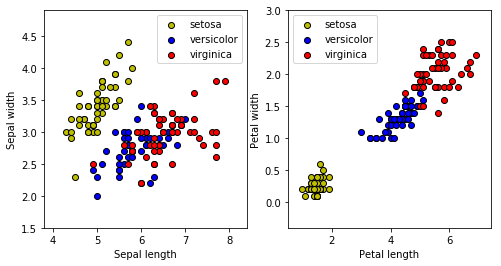

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

plt.figure(figsize=(8,4))

# Plot sepal lengths and weights
plt.subplot(1, 2, 1)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # x axis
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # y axis

plt.scatter(X[y==0, 0], X[y==0, 1], c='y', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[0])
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[1])
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[2])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plot patel lengths and weights
plt.subplot(1, 2, 2)
x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5 # x axis
y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5 # y axis

plt.scatter(X[y==0, 2], X[y==0, 3], c='y', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[0])
plt.scatter(X[y==1, 2], X[y==1, 3], c='b', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[1])
plt.scatter(X[y==2, 2], X[y==2, 3], c='r', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[2])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

最も単純な分類モデルは，[K nearest neighbor](https://ja.wikipedia.org/wiki/K%E8%BF%91%E5%82%8D%E6%B3%95)（KNN，k近傍法）です．このモデルは，テストデータ$X_{test}$の近傍に存在する$k$個の訓練データ$N_k(X_{test})$の多数決で，$X_{test}$のラベルを予測します．特に$k=1$のとき，**最近傍法**と呼ばれ，分類結果は[ボロノイ分割](https://ja.wikipedia.org/wiki/%E3%83%9C%E3%83%AD%E3%83%8E%E3%82%A4%E5%9B%B3)となることが知られています．

In [9]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors

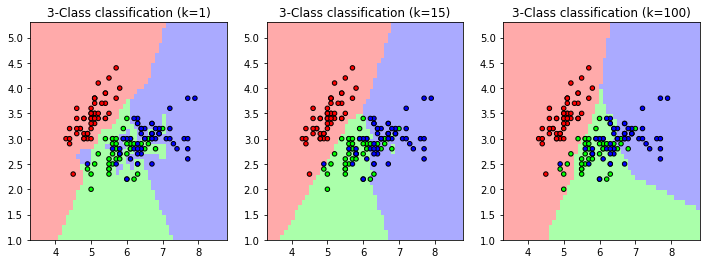

In [10]:
X = iris.data[:, :2]
y = iris.target

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
ks = [1, 15, 100]

plt.figure(figsize=(len(ks)*4, 4))
for ii, k in enumerate(ks):
    plt.subplot(1, len(ks), ii + 1)
    
    clf = neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k={})".format(k))

上図は，$k$を変更した際のKNNの振る舞いを表します．$k$を小さくすると，KNNは訓練データに対する分類性能は高まりますが，小さくしすぎるとテストデータに対する分類性能（**汎化性能**）は落ちてしまいます．この現象は[過学習](https://ja.wikipedia.org/wiki/%E9%81%8E%E5%89%B0%E9%81%A9%E5%90%88)（overfitting）と呼ばれ，機械学習で最も厄介な問題の一つです．$k$を大きくすると汎化性能が高まりますが，大きくしすぎると訓練データの特徴を取りこぼすようになり，やはり汎化性能は落ちてしまいます．

この$k$のように，予測モデルに事前に設定する必要があるパラメータを**ハイパーパラメータ**と呼びます．ここで，ハイパーパラメータは，[Neural network](https://ja.wikipedia.org/wiki/%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF)のユニット間の結合重みのような，予測モデルが学習の結果獲得するパラメータとは異なることにご注意ください．ハイパーパラメータの最適値を求める解析的な枠組みは無いため，[grid search](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)や[cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)を使って網羅的に探索します．

### 2.3.2 次元の呪い

一般に教師あり学習においては，テストデータ$X_{test}$に対する各訓練データ$X$の**"近さ"**にばらつきがあるほど，分類しやすくなります．データ同士の近さは，上記のKNNのように，ユークリッド距離で評価することができます．しかし，データの次元が大きくなるほど，データ同士のユークリッド距離のばらつきが小さくなることが知られています．これを[次元の呪い](https://en.wikipedia.org/wiki/Curse_of_dimensionality)（Curse of dimensionality）と呼びます．

$ \lim_{d \to \infty} \mathbb{E} \left(\dfrac{dist_{max}(d) - dist_{min}(d)}{dist_{min}(d)} \right) = 0 $ 


ここで，$d$は次元数，$dist_{max}(d)$は$d$次元空間における二点のユークリッド距離の最大値，$dist_{min}(d)$は$d$次元空間における二点のユークリッド距離の最小値，$\mathbb{E}$は平均を表します．

[Qiita，次元の呪いについて](https://qiita.com/tn1031/items/96e7131cd41df1aebe85)では，この現象を実験で直感的に解説しており，非常にわかりやすいです．

### 2.3.3 線形回帰

ここでは，[糖尿病患者のデータセット](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)を使い，回帰問題について解説します．このデータセットは，442人の患者の10種類の特徴（年齢，性別，体重，血圧，等）と，1年後の病状（具体的に何の数値化は不明）から構成されます．

In [11]:
diabetes = datasets.load_diabetes()

線形回帰（linear model)では，下式に基づいて$y$を予測します．

$ \hat{y} = X\mathbf{w}$

ここで，$\hat{y}$は$y$の予測値，$\mathbf{w}$は傾きです．線形回帰は，二乗和誤差$\mid \mid \mathbf{y} - \hat{\mathbf{y}} \mid \mid^{2}$を最小化するような$\mathbf{w}$を求めることで，データを学習します．ここで，$\mathbf{y}$は$n$個目の要素が$n$番目の訓練データのラベル$y_{n}$を持つベクトルであり，$\mathbf{\hat{y}}$は$n$個目の要素が$n$番目の訓練データの予測値$\hat{y}_n$から成るベクトルです．

$\frac{d}{d\mathbf{w}}\mid \mid \mathbf{y} - \mathbf{\hat{y}} \mid \mid^{2} = \frac{d}{d\mathbf{w}}(\mathbf{y}-\mathbf{X}\mathbf{w})^T(\mathbf{y}-\mathbf{X}\mathbf{w}) = \mathbf{0}$

ここで，$\mathbf{X}$は$n$行目に$n$番目の訓練データ$X_{n}$を持つ行列です．上式を解くと，最適な傾き$\mathbf{\hat{w}}$が求まります．

$\mathbf{\hat{w}} = \left(\mathbf{X}^T \mathbf{X} \right)^{-1}\mathbf{X}^T \mathbf{y}$

導出の詳細は，[東京大学，線形回帰および識別](http://www.r.dl.itc.u-tokyo.ac.jp/~nakagawa/SML1/lineaR1.pdf)等をご参照ください．

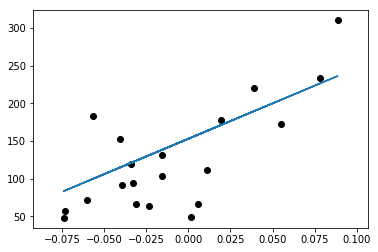

In [12]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)

plt.scatter(diabetes_X_test, diabetes_y_test, color='k')
plt.plot(diabetes_X_test, diabetes_y_pred)

上記の例では`X`が一次元ですが，任意次元の`X`に拡張可能です．

次元あたりのデータ数が少ないとき，線形回帰は訓練データのノイズに影響されてしまいます．

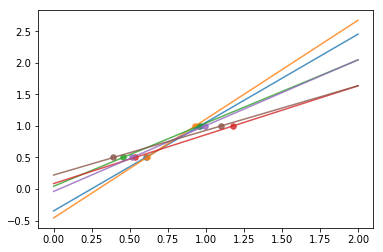

In [13]:
X = np.c_[.5, 1].T
y = [.5, 1]
test = np.c_[0, 2].T
regr = linear_model.LinearRegression()

for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test), alpha=.8)
    plt.scatter(this_X, y, s=30, alpha=.8)

### 2.3.4 リッジ回帰

この課題の解決策として，パラメータ$\mathbf{w}$に対して制限をかける**正則化**があります．代表的な手法として，二乗和誤差$\mid \mid \mathbf{y} - \hat{\mathbf{y}} \mid \mid^{2}$でなく，$\mid \mid \mathbf{y} - \hat{\mathbf{y}} \mid \mid^{2} + \alpha \mid \mid \mathbf{w} \mid \mid^2$を最小化する[リッジ回帰](http://ibisforest.org/index.php?%E3%83%AA%E3%83%83%E3%82%B8%E5%9B%9E%E5%B8%B0)があります．ここで$\alpha$はハイパーパラメータです．$\alpha \mid \mid \mathbf{w} \mid \mid^2$を正則化項と呼びます．線形回帰と同様に解析解$\mathbf{\hat{w}}_{Ridge}$を求めることができます．

$\mathbf{\hat{w}}_{Redge} = \left(\mathbf{X}^T \mathbf{X} + \alpha \mathbf{I} \right)^{-1}\mathbf{X}^T \mathbf{y}$

ここで，$\mathbf{I}$は単位行列です．$\alpha$が大きいほど，$\mathbf{X}$が$\mathbf{\hat{w}}_{Redge}$に与える影響が小さくなります．

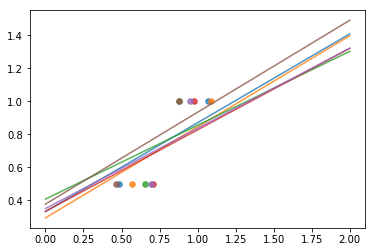

In [14]:
regr = linear_model.Ridge(alpha=.1)

for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test), alpha=.8)
    plt.scatter(this_X, y, s=30, alpha=.8)

線形回帰と比較し，訓練データのノイズに対しロバストであることが確認できました．

### 2.3.5 ラッソ回帰

<IPython.core.display.Javascript object>


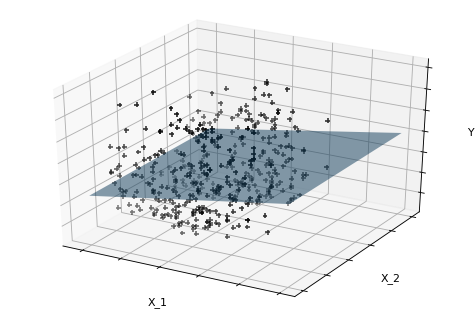

In [16]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

indices = (0, 1)

X_train = diabetes.data[:-20, indices]
X_test = diabetes.data[-20:, indices]
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='k', marker='+')
ax.plot_surface(np.array([[-.1, -.1], [.15, .15]]),
                np.array([[-.1, .15], [-.1, .15]]),
                clf.predict(np.array([[-.1, -.1, .15, .15],
                                      [-.1, .15, -.1, .15]]).T).reshape((2, 2)),
                alpha=.5)
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

**注**：一度目はなぜか3Dプロットが表示されません（たぶん`matplotlib.pyplot`を理解しきれていないことが原因です）．二度実行してください．

`x_2`は`x_1`と比較して，`y`への影響が小さいことがわかります．不要な特徴を除外すれば，性能を落とすことなく，問題を単純化することができます．例えば，[ラッソ回帰](https://qiita.com/satopirka/items/71916560f7efc6eededf)を使うと，不要な特徴に対応する傾き$\mathbf{w}$の要素を$0$にすることができます．このように，意図的に不要なパラメータの値を0にする手法を**スパースな手法**と呼びます．スパースな手法は計算速度の向上や消費メモリの削減に役立ちます．

[ラッソ回帰](http://statweb.stanford.edu/~tibs/lasso/lasso.pdf)は，正則化項として$\beta \mid\mid \mathbf{w} \mid\mid$を用います．ここで$\beta$はハイパーパラメータです．つまり，$\mathbf{\hat{w}}_{Lasso}$は$\mid \mid \mathbf{y} - \hat{\mathbf{y}} \mid \mid^{2} + \beta \mid\mid \mathbf{w} \mid\mid$を最小化する$\mathbf{w}$です．ラッソ回帰は解析的に解けないため，`sklearn.Lasso`では[coordinate decsent](https://en.wikipedia.org/wiki/Coordinate_descent)法で近似解を求めます．

In [17]:
regr = linear_model.Lasso()
X_train = diabetes.data[:-20, :]
y_train = diabetes.target[:-20]
regr.fit(X_train, y_train)
print(regr.coef_) #w_Lasso

[   0.           -0.          357.61234402   11.57097751    0.            0.
   -0.            0.          305.62172841    0.        ]


$\mathbf{\hat{w}}_{Lasso}$は，七つの要素が0になりました．参考までに，リッジ回帰の$\mathbf{\hat{w}}_{Ridge}$は以下です．

In [18]:
regr = linear_model.Ridge()
regr.fit(X_train, y_train)
print(regr.coef_) #w_Ridge

[  34.27253573  -80.06235273  296.73036586  199.14438365    6.14639012
  -26.10294287 -150.21661191  119.4044712   254.49896275  115.68515613]


### 2.3.6 ロジスティック回帰

線形回帰を分類問題に適用するために，[ロジスティクシグモイド関数](https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0)$\sigma(\cdot)$を組み合わせて使うことがあります．

$\hat{y} = \sigma(X\mathbf{w} + w_0) = \dfrac{1}{1 + \mathrm{exp}(-X\mathbf{w} - w_0)}$

ここで，$w_0$は切片を表すパラメータです．これを[ロジスティック回帰](https://ja.wikipedia.org/wiki/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0)と呼びます．

([], <a list of 0 Text yticklabel objects>)

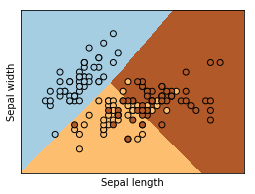

In [19]:
%matplotlib inline 

X = iris.data[:, :2]
Y = iris.target

h = .02 # メッシュ間隔

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, Y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# 予測結果のプロット
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# 訓練データのプロット
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

### 2.3.7 Support Vector Machine (SVM)

[Support vector machine](https://ja.wikipedia.org/wiki/%E3%82%B5%E3%83%9D%E3%83%BC%E3%83%88%E3%83%99%E3%82%AF%E3%82%BF%E3%83%BC%E3%83%9E%E3%82%B7%E3%83%B3)は，現在知られている手法の中でも認識性能が優れたモデルの一つであり，分類および回帰の両方に適用可能です．詳細は[栗田多喜夫，サポートベクターマシン入門](http://home.hiroshima-u.ac.jp/tkurita/lecture/svm.pdf)や[C. M. ビショップ，パターン認識と機械学習](https://www.amazon.co.jp/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98%E3%81%A8%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92-%E4%B8%8B-%E3%83%99%E3%82%A4%E3%82%BA%E7%90%86%E8%AB%96%E3%81%AB%E3%82%88%E3%82%8B%E7%B5%B1%E8%A8%88%E7%9A%84%E4%BA%88%E6%B8%AC-C-M-%E3%83%93%E3%82%B7%E3%83%A7%E3%83%83%E3%83%97/dp/4621061240)をご参照ください．

最も単純なSVMは，1963年に提案された線形SVMです．

![hard_svm](fig/hard_svm.png)

観測$\mathbf{x_n}$に対して，下式でラベル$y_n \in \{-1, 1\}$を予測することを考えます．

$\hat{y}_n = \mathrm{sign}(\mathbf{w}^T \mathbf{x}_n + b$)

ここで，$\mathrm{sign}(\cdot)$は，入力が非負のとき1を，負のとき-1を返す関数です．

![soft_svm](fig/soft_svm.png)

![phi](fig/phi.png)

## 2.4 モデル選択

## 2.5 教師なし学習

## 2.6 まとめ

## 2.7 ヘルプ

## 2.8 参考文献

* [scikit-learn，A tutorial on statistical-learning for scientific data processing](http://scikit-learn.org/stable/tutorial/statistical_inference/index.html)：本ノートブックのベース．
* [SlideShare，はじめてのパターン認識 第5章 k最近傍法(k_nn法)](https://www.slideshare.net/moa108/5-kknn)：KNNの直感的な解説．